# Análisis Exploratorio


In [26]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns

In [27]:
# Configurar pandas para que muestre todas las columnas
pd.set_option('display.max_columns', None)

# Configurar pandas para que muestre todas las filas
pd.set_option('display.max_rows', None)

#### Leemos los datos del CSV


In [28]:
data = pd.read_csv('movies.csv', encoding='ISO-8859-1')

1. Haga una exploración rápida de sus datos, para eso haga un resumen de su
   conjunto de datos.


<small>Usamos `data.describe()` en Python para obtener un resumen estadístico rápido de los datos en un DataFrame de pandas. Este método proporciona información esencial como la media, la desviación estándar, los valores mínimo y máximo, y los percentiles (25%, 50%, 75%) para cada columna numérica. Esto nos ayuda a entender mejor la distribución y las características generales de los datos, identificar posibles valores atípicos y guiar el análisis exploratorio de datos.</small>


In [31]:
# Lista de columnas cuantitativas que se convertirán a numéricas
quantitative_columns = [
    "actorsPopularity",'popularity', 'budget', 'revenue', 'runtime', 'genresAmount', 
    'productionCoAmount', 'productionCountriesAmount', 'voteCount', 
    'voteAvg', 'actorsAmount', 'castWomenAmount', 'castMenAmount'
]

# Calcular la media de los valores numéricos en 'actorsPopularity', separados por pipes
data['actorsPopularity'] = data['actorsPopularity'].apply(
    lambda x: np.mean([float(i) for i in str(x).split('|') if i.replace('.', '', 1).isdigit()])
    if pd.notnull(x) else np.nan
)

# Convertir 'releaseDate' a datetime
data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')

# Convertir columnas cuantitativas a tipo numérico
for column in quantitative_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Eliminar la columna 'id'
data_without_id = data.drop(columns=['id'])

data_without_id.describe()






,budget,revenue,runtime,actorsPopularity,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
count,1.000000e+04,1.000000e+04,10000.000000,9877.000000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9963.000000,9838.000000
mean,1.855163e+07,5.673793e+07,100.268100,5.285245,51.393907,2009-01-09 17:35:05.280000,6.483490,1342.381800,2.596500,3.171400,1.751000,2147.666600,7004.157784,16557.193434
min,0.000000e+00,0.000000e+00,0.000000,0.600000,4.258000,1902-04-17 00:00:00,1.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,90.000000,3.344548,14.577750,2004-11-10 00:00:00,5.900000,120.000000,2.000000,2.000000,1.000000,13.000000,3.000000,7.000000
50%,5.000000e+05,1.631245e+05,100.000000,4.885758,21.905500,2013-03-08 00:00:00,6.500000,415.000000,3.000000,3.000000,1.000000,21.000000,6.000000,12.000000
75%,2.000000e+07,4.479661e+07,113.000000,6.752083,40.654000,2018-03-07 06:00:00,7.200000,1316.000000,3.000000,4.000000,2.000000,36.000000,10.000000,20.000000
max,3.800000e+08,2.847246e+09,750.000000,82.570000,11474.647000,2022-01-21 00:00:00,10.000000,30788.000000,16.000000,89.000000,155.000000,919590.000000,922162.000000,922017.000000
std,3.662669e+07,1.495854e+08,27.777829,3.050922,216.729552,NaN,0.984274,2564.196637,1.154565,2.539738,3.012093,37200.075802,67239.619658,100455.960117


<small>El método `pd.info()` en pandas se utiliza para obtener un resumen conciso de un DataFrame. Proporciona información sobre:</small>

- <small>El número de filas y columnas.</small>
- <small>Los nombres de las columnas.</small>
- <small>El tipo de datos de cada columna.</small>
- <small>El número de valores no nulos en cada columna.</small>

<small>Esto es útil para entender rápidamente la estructura y las características básicas del conjunto de datos antes de realizar un análisis más profundo.</small>


In [32]:
print(data_without_id.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   budget                     10000 non-null  int64         
 1   genres                     9947 non-null   object        
 2   homePage                   4193 non-null   object        
 3   productionCompany          9543 non-null   object        
 4   productionCompanyCountry   8720 non-null   object        
 5   productionCountry          9767 non-null   object        
 6   revenue                    10000 non-null  float64       
 7   runtime                    10000 non-null  int64         
 8   video                      9514 non-null   object        
 9   director                   9926 non-null   object        
 10  actors                     9920 non-null   object        
 11  actorsPopularity           9877 non-null   float64       
 12  actor

<small>`isnull().sum()` nos sirve para saber la suma de cuántos valores son nulos para cada columna de nuestro dataset.</small>


In [33]:
print(data_without_id.isnull().sum())

budget                          0
genres                         53
homePage                     5807
productionCompany             457
productionCompanyCountry     1280
productionCountry             233
revenue                         0
runtime                         0
video                         486
director                       74
actors                         80
actorsPopularity              123
actorsCharacter                47
originalTitle                   0
title                           0
originalLanguage                0
popularity                      0
releaseDate                     0
voteAvg                         0
voteCount                       0
genresAmount                    0
productionCoAmount              0
productionCountriesAmount       0
actorsAmount                    0
castWomenAmount                37
castMenAmount                 162
dtype: int64


<small>Ahora que ya sabemos cuántos datos faltan, sería mucho mejor saber cuánto porcentaje de ellos falta:</small>


In [34]:
# Porcentaje de datos faltantes por columna
missing_data = (data_without_id.isnull().sum() / len(data_without_id)) * 100
print(missing_data)

budget                        0.00
genres                        0.53
homePage                     58.07
productionCompany             4.57
productionCompanyCountry     12.80
productionCountry             2.33
revenue                       0.00
runtime                       0.00
video                         4.86
director                      0.74
actors                        0.80
actorsPopularity              1.23
actorsCharacter               0.47
originalTitle                 0.00
title                         0.00
originalLanguage              0.00
popularity                    0.00
releaseDate                   0.00
voteAvg                       0.00
voteCount                     0.00
genresAmount                  0.00
productionCoAmount            0.00
productionCountriesAmount     0.00
actorsAmount                  0.00
castWomenAmount               0.37
castMenAmount                 1.62
dtype: float64


<small>Ahora veamos cuántos datos están duplicados:</small>


In [35]:
print("La cantidad de valores duplicados es:", data_without_id.duplicated().sum())

La cantidad de valores duplicados es: 0


#### ¿Cuál es el propósito de hacer histogramas?

<small> Los histogramas son útiles para visualizar la distribución de datos numéricos. Permiten identificar rápidamente la forma de la distribución (normal, sesgada, bimodal, etc.), la presencia de valores atípicos y cómo están agrupados los valores. Este código genera histogramas de todas las variables numéricas en el conjunto de datos, ajustando el tamaño de la figura para una visualización clara.</small>


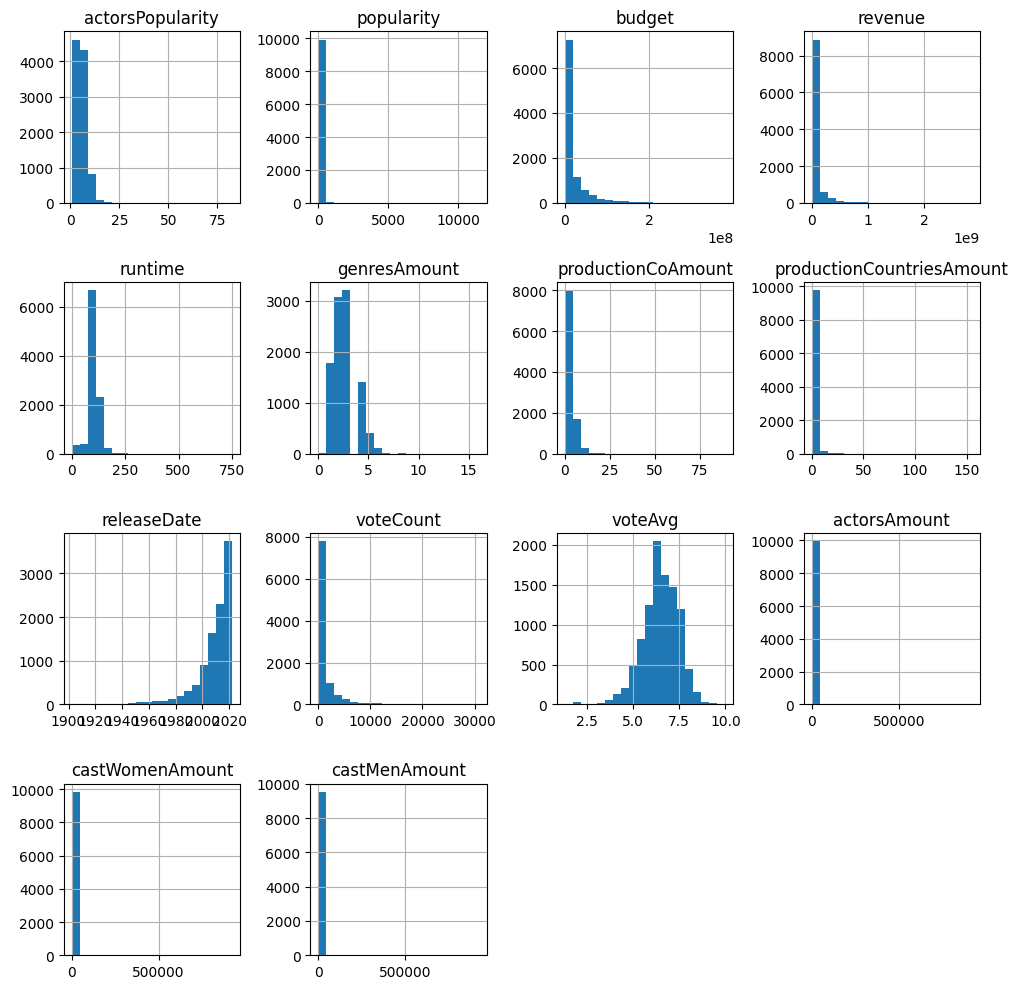

In [39]:
columns_to_plot = [
    'actorsPopularity','popularity', 'budget', 'revenue', 'runtime', 'genresAmount', 
    'productionCoAmount', 'productionCountriesAmount', 'releaseDate', 
    'voteCount', 'voteAvg','actorsAmount', 'castWomenAmount', 'castMenAmount'
]

# Filter the columns that exist in data_without_id
existing_columns_to_plot = [col for col in columns_to_plot if col in data_without_id.columns]

data_without_id[existing_columns_to_plot].hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

#### ¿Cuál es el propósito de hacer box plots?

<small>Los gráficos de caja muestran la distribución de datos numéricos y son especialmente buenos para identificar valores atípicos y entender la dispersión de los datos (mediante cuartiles y medianas). Este código crea un gráfico de caja para cada variable numérica, organizándolos en una matriz de gráficos para facilitar la comparación.</small>


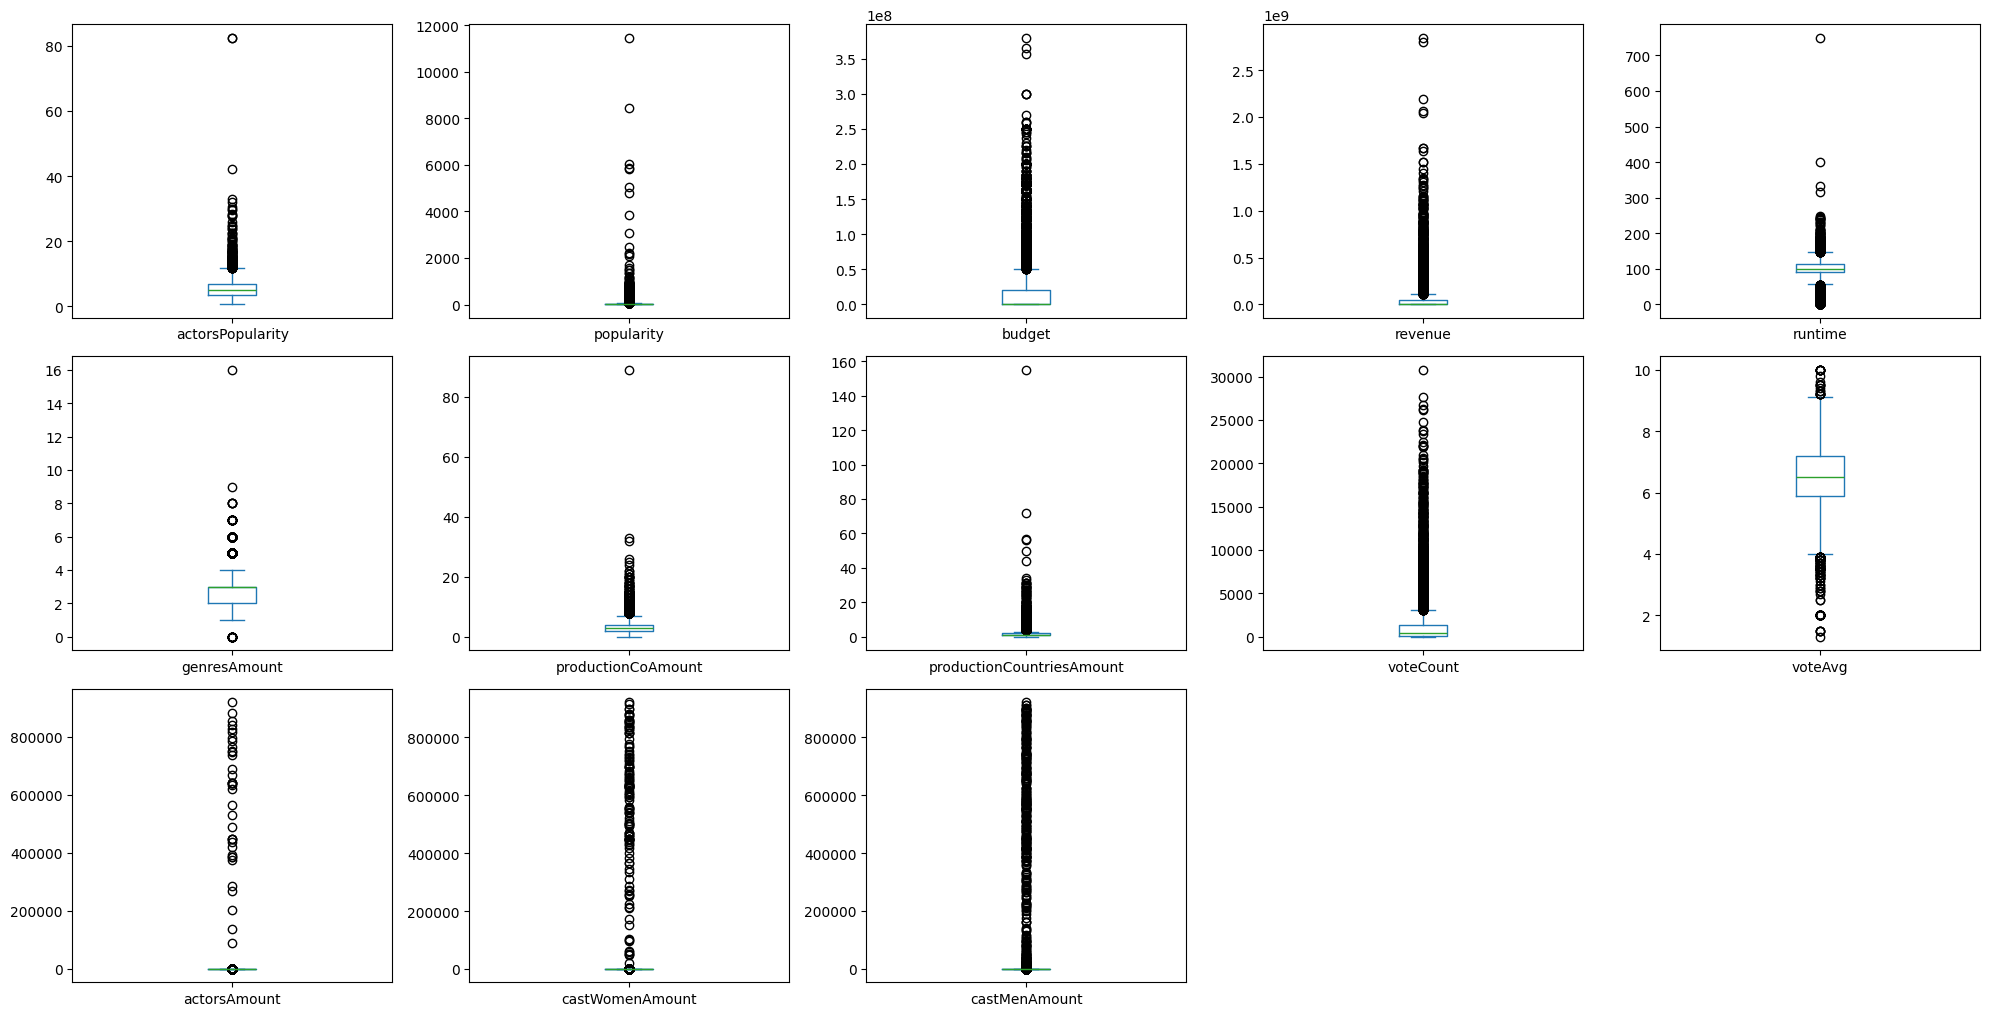

In [41]:
# Lista de columnas para hacer los box plots (excluyendo 'releaseDate' que es datetime)
columns_to_plot = [
    'actorsPopularity', 'popularity', 'budget', 'revenue', 'runtime', 'genresAmount', 
    'productionCoAmount', 'productionCountriesAmount', 'voteCount', 
    'voteAvg', 'actorsAmount', 'castWomenAmount', 'castMenAmount'
]

# Filtrar las columnas que existen en data_without_id y son numéricas
existing_columns_to_plot = [col for col in columns_to_plot if col in data_without_id.columns]

# Crear un DataFrame solo con las columnas filtradas
data_for_boxplots = data_without_id[existing_columns_to_plot]

# Generar los box plots
data_for_boxplots.plot(kind='box', subplots=True, layout=(6, 5), figsize=(20, 20))  # Ajusta el layout según necesidad
plt.tight_layout()  # Ajusta el layout para evitar que los gráficos se sobrepongan
plt.show()

#### ¿Cuál es el propósito de hacer una matriz de correlación?

<small>La matriz de correlación es una herramienta para identificar y visualizar correlaciones entre variables numéricas. Los valores de correlación pueden indicar la fuerza y la dirección de la relación lineal entre pares de variables. Este código calcula y muestra la matriz de correlación, ayudando a identificar variables que están potencialmente relacionadas entre sí.</small>


In [42]:
# Select only numeric columns
numeric_data = data_without_id.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
print(corr_matrix)

                             budget   revenue   runtime  actorsPopularity  \
budget                     1.000000  0.757454  0.281498          0.133077   
revenue                    0.757454  1.000000  0.248655          0.082083   
runtime                    0.281498  0.248655  1.000000         -0.052840   
actorsPopularity           0.133077  0.082083 -0.052840          1.000000   
popularity                 0.160191  0.162546  0.032538          0.072600   
voteAvg                    0.044371  0.141262  0.220476         -0.012576   
voteCount                  0.630257  0.768255  0.282363          0.072991   
genresAmount               0.198347  0.136228  0.029798          0.082591   
productionCoAmount         0.130134  0.058799  0.159282          0.012264   
productionCountriesAmount -0.036670 -0.038485  0.015323         -0.017319   
actorsAmount              -0.026730 -0.019555 -0.091217          0.080767   
castWomenAmount           -0.047709 -0.037397 -0.171185          0.039837   

#### ¿Cuál es el propósito de hacer un mapa de calor de la matriz de correlación?

<small>Los mapas de calor permiten visualizar la matriz de correlación de manera más intuitiva, usando colores para representar los valores de correlación, facilitando la identificación de relaciones fuertes. Este código crea un mapa de calor con anotaciones que muestran los valores exactos de correlación, haciendo la matriz más accesible y fácil de interpretar.</small>


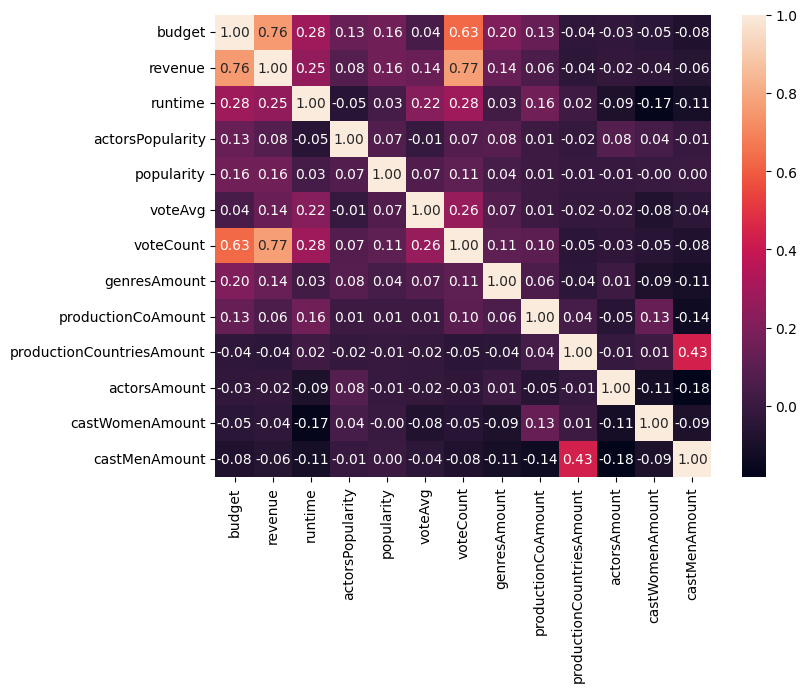

In [43]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

### Tabla de Frecuencias de Variables Cualitativas


<small> En este apartado, se muestran las tablas de frecuencia para diversas variables cualitativas dentro del _dataset_. Estas tablas muestran la cantidad de veces que cada valor único aparece en el conjunto de datos, proporcionando una visión clara de la distribución y prevalencia de las características observadas. Este análisis ayuda a identificar tendencias, valores atípicos y posibles inconsistencias en los datos.

A continuación, se detallan las tablas de frecuencia para las siguientes variables del _dataset_:

- **homePage**: Muestra las URL de las páginas de inicio asociadas a cada película, ofreciendo una visión de la disponibilidad y popularidad de sitios web específicos dentro del corpus de datos.

- **video**: Indica la presencia o ausencia de videos promocionales para las películas, lo cual es relevante para análisis de marketing y promoción.

- **director**: Proporciona una cuenta de las películas dirigidas por cada director, reflejando quiénes son los más prolíficos o destacados en el dataset.
- **originalTitle** y **title**: Presentan la diversidad de títulos en diferentes idiomas, lo que es útil para entender la variedad y la internacionalización del contenido.
- **originalLanguage**: Muestra la distribución de los idiomas originales de las películas, crucial para estudios de mercado y distribución regional.
- **productionCompany**: Ilustra las compañías productoras involucradas, lo cual es esencial para análisis de la industria cinematográfica y asociaciones corporativas.
- **genres**: Detalla los géneros de películas, proporcionando una visión de las tendencias de la industria y las preferencias del público.
- **actors**: Enumera la frecuencia con que aparecen los actores, lo que puede indicar la popularidad o demanda de ciertos actores.
- **actorsCharacter**: Muestra los personajes representados, ofreciendo insights sobre la diversidad de roles y su recepción.

</small>


In [11]:
# Loading the CSV file using a specific character encoding to handle special characters
df = pd.read_csv('movies.csv', encoding='ISO-8859-1')

# List of qualitative (categorical) columns to analyze
cualitative_columns = [
    'homePage', 'video', 'director', 'originalTitle', 'title', 'originalLanguage'
]

# Creating a frequency table dictionary where the key is the column name and the value is the frequency count of unique entries in that column
freq_table = {col: df[col].value_counts() for col in cualitative_columns}

# Dictionary for handling columns that contain multiple values separated by '|'
multiple_value_columns = {
    'genres': 'genres',
    'actors': 'actors',
    'actorsCharacter': 'actorsCharacter',
    'productionCompanyCountry': 'productionCompanyCountry',
    'productionCountry': 'productionCountry', 
    'productionCompany': 'productionCompany' 
}

# Iterating over the dictionary to split the entries by '|', explode them into separate rows, and count the frequency of each unique value
for key, value in multiple_value_columns.items():
    all_items = df[value].dropna().str.split('|').explode()
    freq_table[value] = all_items.value_counts()

# Printing the frequency table for each column. The 'display' function from IPython.display is used here for a more formatted output, suitable for Jupyter notebooks.
for column, table in freq_table.items():
    print(f"Tabla de frecuencias para la variable: {column}")
    display(table.reset_index().head(30)) 
    print("\n")


Tabla de frecuencias para la variable: homePage


,homePage,count
0,http://www.naruto-movie.com/,6
1,http://www.thehungergames.movie/,4
2,http://www.kungfupanda.com/,3
3,http://initiald-movie.com/,3
4,http://www.kungfupanda.com,3
5,http://www.transformersmovie.com/,3
6,http://www.americanreunionmovie.com/,3
7,http://wwws.warnerbros.co.jp/rurouni-kenshin/i...,3
8,http://www.missionimpossible.com/,3
9,http://www.p3m.jp/,3




Tabla de frecuencias para la variable: video


,video,count
0,False,9430
1,True,84




Tabla de frecuencias para la variable: director


,director,count
0,Steven Spielberg,29
1,Clint Eastwood,28
2,Ridley Scott,23
3,Martin Scorsese,19
4,Kunihiko Yuyama,19
5,Steven Soderbergh,19
6,Ron Howard,18
7,Robert Zemeckis,18
8,Woody Allen,17
9,Sam Liu,16




Tabla de frecuencias para la variable: originalTitle


,originalTitle,count
0,Pinocchio,4
1,Cinderella,3
2,Les Misérables,3
3,Carrie,3
4,Prey,3
5,Great Expectations,3
6,Fallen,3
7,<U+30C9><U+30E9><U+3048><U+3082><U+3093> <U+30...,3
8,Awake,3
9,The Courier,3




Tabla de frecuencias para la variable: title


,title,count
0,Pinocchio,4
1,Cinderella,4
2,Halloween,3
3,Fallen,3
4,Godzilla,3
5,Little Women,3
6,Carrie,3
7,Euphoria,3
8,Robin Hood,3
9,Great Expectations,3




Tabla de frecuencias para la variable: originalLanguage


,originalLanguage,count
0,en,7772
1,ja,644
2,es,425
3,fr,271
4,ko,167
5,zh,119
6,it,100
7,de,84
8,cn,80
9,ru,67




Tabla de frecuencias para la variable: genres


,genres,count
0,Drama,3789
1,Comedy,3018
2,Action,2632
3,Thriller,2565
4,Adventure,1769
5,Horror,1512
6,Animation,1460
7,Romance,1428
8,Family,1407
9,Fantasy,1284




Tabla de frecuencias para la variable: actors


,actors,count
0,FALSE,480
1,Frank Welker,143
2,Grey DeLisle,97
3,Jeff Bennett,91
4,Fred Tatasciore,86
5,Samuel L. Jackson,85
6,Dee Bradley Baker,82
7,Bruce Willis,80
8,Tara Strong,79
9,Kevin Michael Richardson,79




Tabla de frecuencias para la variable: actorsCharacter


,actorsCharacter,count
0,,4474
1,Self,1723
2,Additional Voices (voice),1566
3,Himself,1445
4,Dancer,1008
5,(voice),666
6,Reporter,434
7,Herself,425
8,Nurse,392
9,Doctor,379




Tabla de frecuencias para la variable: productionCompanyCountry


,productionCompanyCountry,count
0,US,12675
1,,7735
2,JP,1604
3,FR,1478
4,GB,1413
5,DE,511
6,CA,507
7,ES,463
8,KR,395
9,BE,255




Tabla de frecuencias para la variable: productionCountry


,productionCountry,count
0,United States of America,6788
1,United Kingdom,1171
2,Japan,731
3,France,668
4,Canada,634
5,Germany,507
6,Spain,282
7,China,231
8,Italy,210
9,Australia,188




Tabla de frecuencias para la variable: productionCompany


,productionCompany,count
0,Warner Bros. Pictures,480
1,Universal Pictures,466
2,Columbia Pictures,347
3,Paramount,320
4,20th Century Fox,310
5,Walt Disney Pictures,221
6,New Line Cinema,176
7,Lionsgate,168
8,Canal+,167
9,Metro-Goldwyn-Mayer,161
